# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"] - 273.15
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uturoa
Processing Record 2 of Set 1 | praia da vitoria
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | kirkland lake
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | calama
Processing Record 12 of Set 1 | makoua
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | nastola
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | malango
Processing Record 19 of Set 1 | viana do castelo
Processing Record 20 of Set 1 | sumqayit
Processing Record 21 of Set 1 | istgah-e rah ahan-e gar

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uturoa,-16.7333,-151.4333,25.63,82,99,3.92,PF,1726524656
1,praia da vitoria,38.7333,-27.0667,23.20,88,100,6.37,PT,1726524657
2,edinburgh of the seven seas,-37.0676,-12.3116,10.26,67,26,17.28,SH,1726524658
3,blackmans bay,-43.0167,147.3167,9.29,67,97,0.45,AU,1726524659
4,georgetown,5.4112,100.3354,25.96,89,40,1.03,MY,1726524660


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,25.63,82,99,3.92,PF,1726524656
1,praia da vitoria,38.7333,-27.0667,23.20,88,100,6.37,PT,1726524657
2,edinburgh of the seven seas,-37.0676,-12.3116,10.26,67,26,17.28,SH,1726524658
3,blackmans bay,-43.0167,147.3167,9.29,67,97,0.45,AU,1726524659
4,georgetown,5.4112,100.3354,25.96,89,40,1.03,MY,1726524660


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

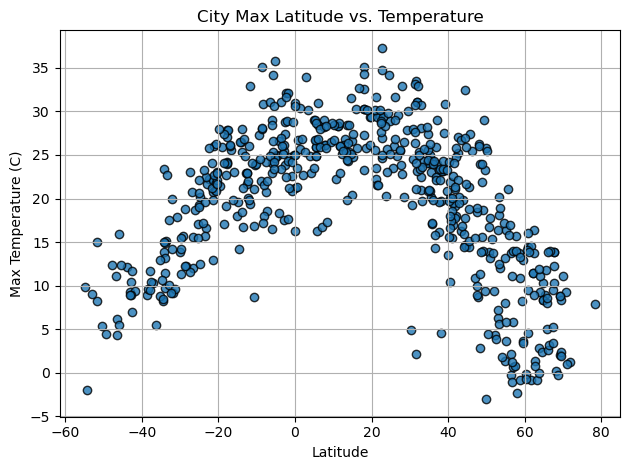

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

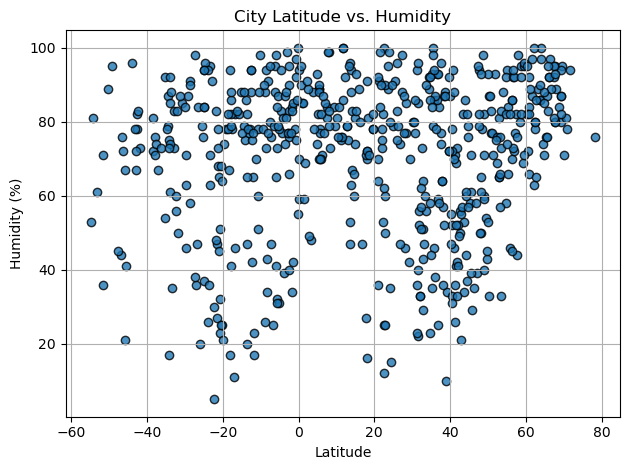

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

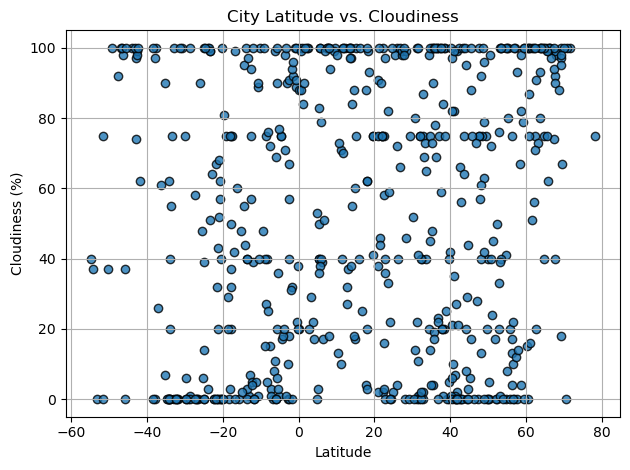

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

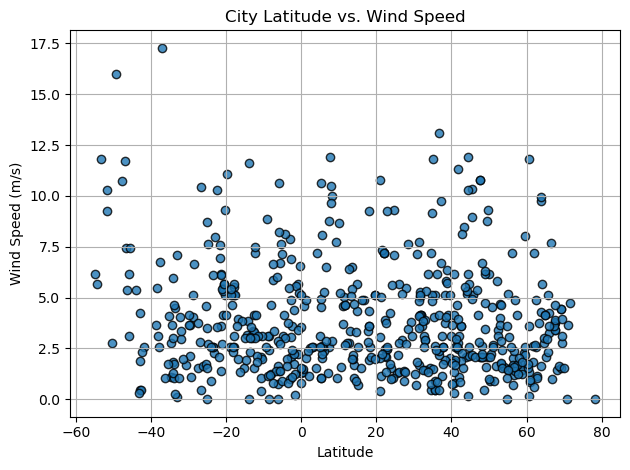

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, p_value, stderr) = linregress(x_values, y_values)
    
    # Create the regression line equation
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot the scatter plot
    plt.scatter(x_values, y_values, marker="o", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation on the plot
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")
    
    # Incorporate labels, title, and grid
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    print(f"The r^2-value is: {rvalue}")
    
    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,praia da vitoria,38.7333,-27.0667,23.20,88,100,6.37,PT,1726524657
4,georgetown,5.4112,100.3354,25.96,89,40,1.03,MY,1726524660
5,kirkland lake,48.1446,-80.0377,26.27,50,13,2.62,CA,1726524662
6,bilibino,68.0546,166.4372,0.15,89,98,1.43,RU,1726524663
8,petropavlovsk-kamchatsky,53.0452,158.6483,6.33,65,20,4.00,RU,1726524665


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uturoa,-16.7333,-151.4333,25.63,82,99,3.92,PF,1726524656
2,edinburgh of the seven seas,-37.0676,-12.3116,10.26,67,26,17.28,SH,1726524658
3,blackmans bay,-43.0167,147.3167,9.29,67,97,0.45,AU,1726524659
7,waitangi,-43.9535,-176.5597,12.12,96,100,5.36,NZ,1726524664
10,calama,-22.4667,-68.9333,22.27,5,0,10.29,CL,1726524667


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.7496167665731924


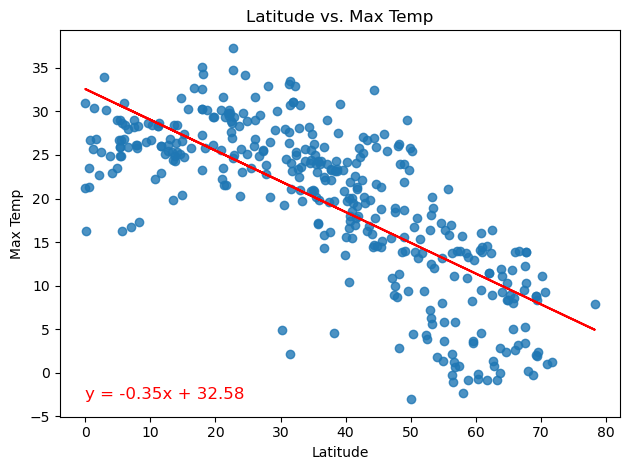

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       "Latitude", 
                       "Max Temp", 
                       "Latitude vs. Max Temp")

The r^2-value is: 0.7954422817612232


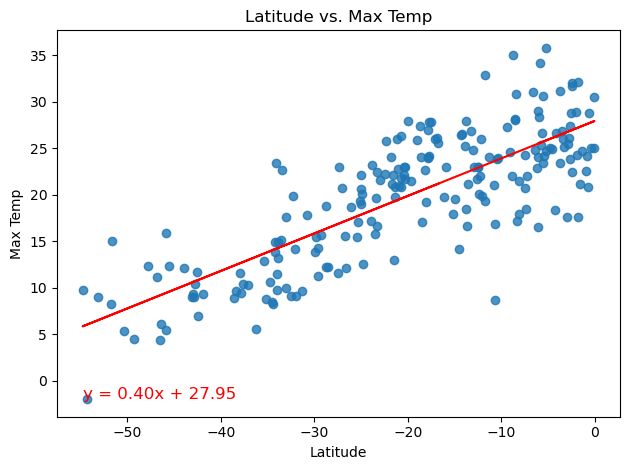

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Max Temp"], 
                       "Latitude", 
                       "Max Temp", 
                       "Latitude vs. Max Temp")

**Discussion about the linear relationship:** The scatter plot for the Northern Hemisphere shows a clear negative correlation. As latitude increases from the equator to the North Pole, the temperatures generally decrease. For the Southern Hemisphere, the scatter plot shows a clear positive correlation. The temperatures generally decrease as latitide moves away from the equator towards -90.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.049161493192255976


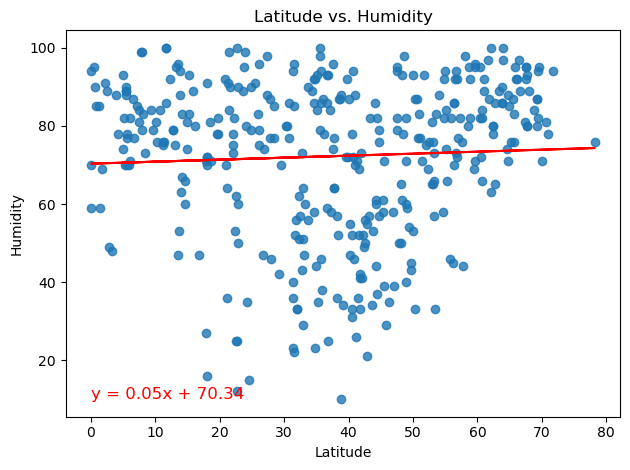

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Humidity"], 
                       "Latitude", 
                       "Humidity", 
                       "Latitude vs. Humidity")

The r^2-value is: 0.07127728822208462


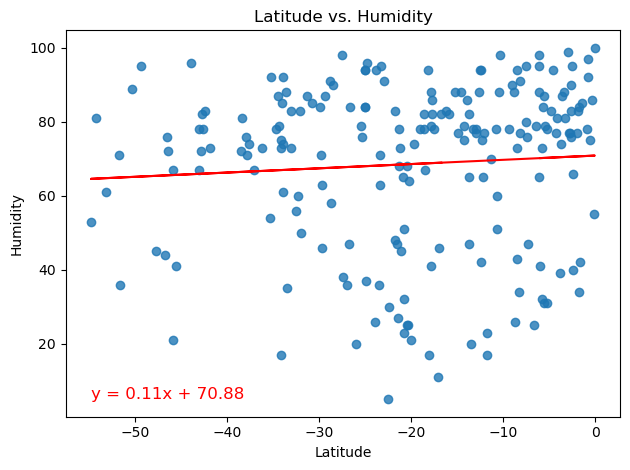

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Humidity"], 
                       "Latitude", 
                       "Humidity", 
                       "Latitude vs. Humidity")

**Discussion about the linear relationship:** The correlation between latitude and humidity in both the Northern and Southern Hemisphere is weak and lacks a clear pattern. The slope is nearly flat and the pattern is scattered which shows that latitude is not a significant predictor of humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0072492959986824234


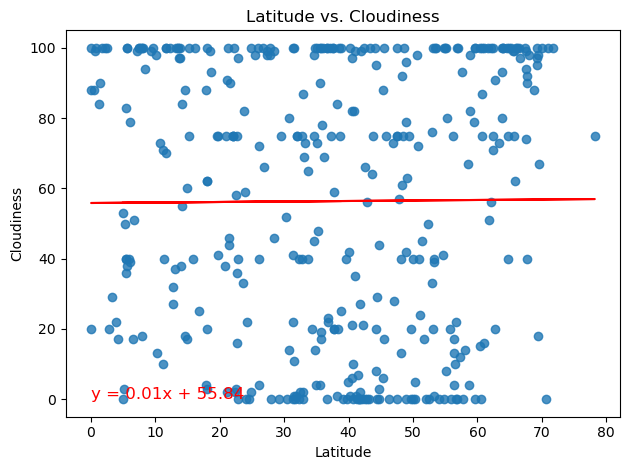

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness", 
                       "Latitude vs. Cloudiness")

The r^2-value is: -0.05179839521299262


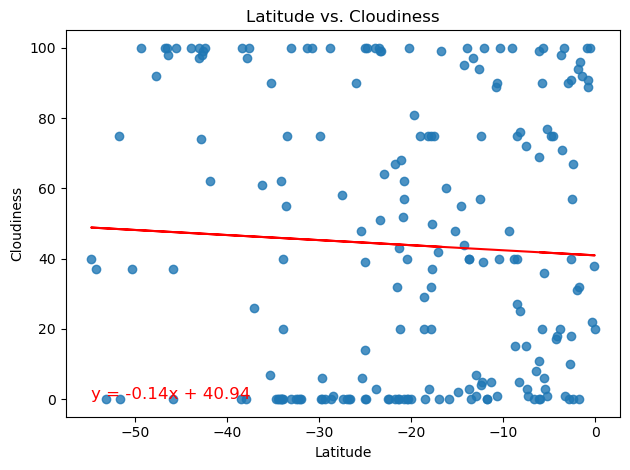

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Cloudiness"], 
                       "Latitude", 
                       "Cloudiness", 
                       "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** Similar to humidity, the correlation between latitude and cloudiness in both the Northern and Southern Hemisphere is weak and lacks a clear pattern.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.10413311852192068


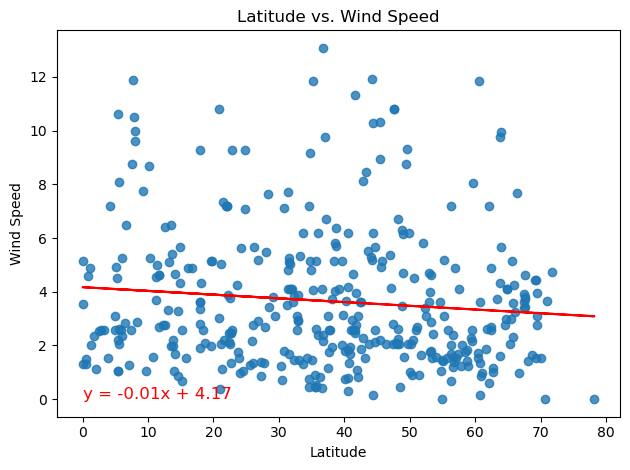

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed", 
                       "Latitude vs. Wind Speed")

The r^2-value is: -0.2201978217911131


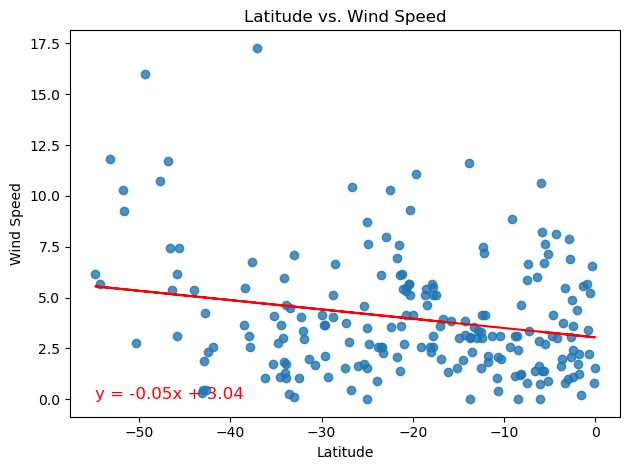

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Wind Speed"], 
                       "Latitude", 
                       "Wind Speed", 
                       "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** Lastly, the correlation between latitude and wind speed in both the Northern and Southern Hemisphere is weak. For both hemispheres, latitude is not a reliable predictor of wind speed.